By default, GPU is turned off. You should activate it in settings: Runtime->Change Runtime type->GPU

In [2]:
!nvidia-smi
!python3 --version

Sat May 21 08:34:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Google Drive integration

In [3]:
from google.colab import drive

shared_folder = '/content/drive'
drive.mount(shared_folder)
%cd '/content/drive/My Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


## Access to datasets


In [8]:
#%cd /content
#!cp '/content/drive/My Drive/Colab Notebooks/AIJ/256_ObjectCategories.tar' /content/256_ObjectCategories.tar
#!tar xvf /content/256_ObjectCategories.tar

## Limitations
Google Drive has limitations on amount of downloaded files. It is recommended to avoid downloading big datasets from Google Drive if they can be obtained by direct link.

In [5]:
!wget -N https://s3-us-west-2.amazonaws.com/dl.fbaipublicfiles.com/LVIS/lvis_v1_val.json.zip
!unzip -n lvis_v1_val.json.zip

--2022-05-21 05:31:18--  https://s3-us-west-2.amazonaws.com/dl.fbaipublicfiles.com/LVIS/lvis_v1_val.json.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.205.88
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.205.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64026968 (61M) [application/zip]
Saving to: ‘lvis_v1_val.json.zip’

lvis_v1_val.json.zi 100%[===================>]  61.06M  17.4MB/s    in 4.5s    

2022-05-21 05:31:23 (13.5 MB/s) - ‘lvis_v1_val.json.zip’ saved [64026968/64026968]

Archive:  lvis_v1_val.json.zip
  inflating: lvis_v1_val.json        


# 2.1 Today task
Traffic signs classification

## ML systems pipeline



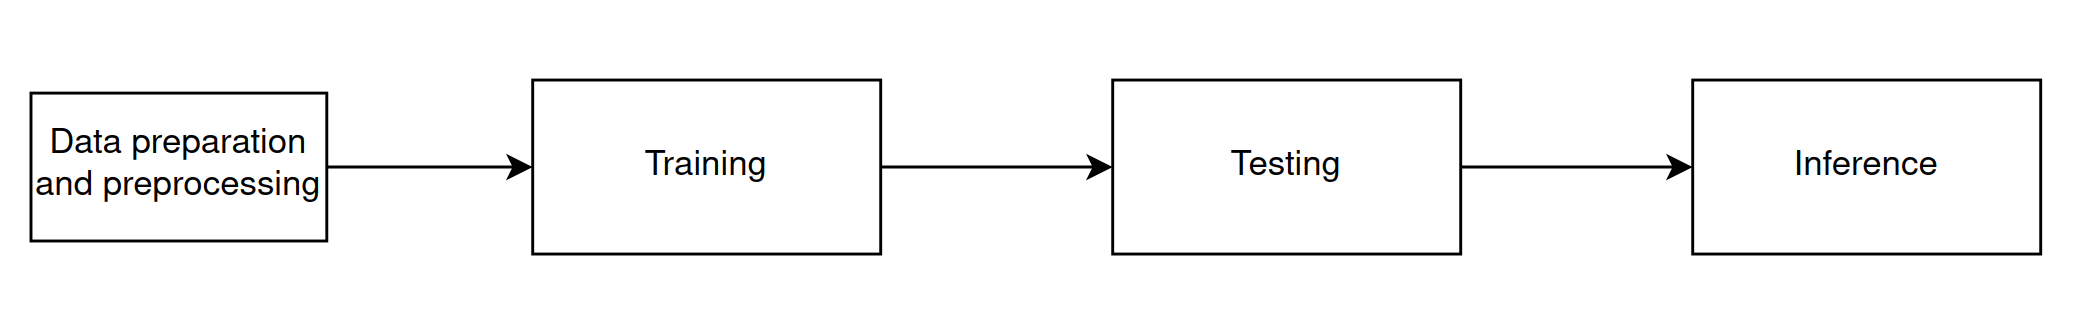

## Dataset downloading

In [6]:
import os
import gdown
import shutil
# https://drive.google.com/file/d/1KyZjiUJfXoI53Jha1-CH3rma8dDg5-z7/view?usp=sharing
save_folder = './dataset'

os.makedirs(save_folder, exist_ok=True)

print("Downloading data archive...", end=" ")

id = '1KyZjiUJfXoI53Jha1-CH3rma8dDg5-z7'
gdown.download(f'https://drive.google.com/uc?id={id}', f"{save_folder}/dataset.zip", quiet=False)

shutil.unpack_archive(f"{save_folder}/dataset.zip", save_folder)

print("Done!")

Downloading...
From: https://drive.google.com/uc?id=1KyZjiUJfXoI53Jha1-CH3rma8dDg5-z7
To: /content/dataset/dataset.zip
100%|██████████| 642M/642M [00:08<00:00, 71.5MB/s]


Done!


## Supervised learning

We have input data X and corresponding output data Y.
In supervised learning you are to create a function F(x), performing translation $F: X → Y $.

Example: $ S = π R^2$ - Function that translates radius of circle to it's area.

Neural network plays role of this function. A goal of learning is to find parameters of NN, performing translation with minimum error.


## How to formulate image classification task in mathematical language?

Image -> array of pixels with values [0...255]


class label -> class id -> One-Hot encoding (sometimes)

"Stop" -> 5 -> [ 0 0 0 0 0 1 0 0 0 0 ]



## PyTorch
Pytorch is a framework for building deep learning systems.

In a basis PyTorch has automatic differentiating that is crucial to training of NNs.

Maing features of PyTorch:
- data preparation
- common layers of NNs
- Optimization methods (optimizers)
- Loss functions
- Profiling
- deploying and compression methods


## Tensors (in programming)
 - vector - set of numbers
 - Matrix - "table" of numbers (generalization of vector to 2 dimensions)
 - Tensor - generalization of matrix to N dimensions

Tensor in Pytorch - n-dimensional array (like ndarray in Numpy)


In [9]:
import torch

set_of_n = [1, 4, 38, 28]

a = torch.Tensor([1, 2, 3, 4])
print(a, a.shape)

b = torch.randn((5, 5, 3))
print(b, b.shape)

# access to elements of a tensor
print(b[0, 4, 2]) 

print(a[1:-1])

c = b.numpy() # obtaining numpy array from tensor



tensor([1., 2., 3., 4.]) torch.Size([4])
tensor([[[-0.7870,  1.2899, -1.6014],
         [-0.5716,  0.3794, -1.1401],
         [-1.3150, -0.0067, -1.0426],
         [-0.0797, -0.0962, -0.3103],
         [-1.2656, -0.6092,  0.3417]],

        [[ 1.0697,  0.3745,  0.6502],
         [ 0.0634,  0.3242, -1.2481],
         [ 1.2442,  0.4344,  0.2386],
         [-0.1611, -1.3917,  3.1973],
         [ 0.1808, -0.4626, -1.0397]],

        [[ 1.8344, -1.3870,  1.0290],
         [ 1.3966,  1.3605, -0.9338],
         [-0.1066,  1.8129, -0.2478],
         [-0.5271,  0.0337,  0.5203],
         [-0.2422,  0.5444, -1.3873]],

        [[-0.5936, -2.5633, -1.7547],
         [-0.0270,  1.8300,  1.0774],
         [ 0.9810,  3.2894,  0.0318],
         [ 0.6033, -0.9508, -0.3776],
         [ 0.3745, -1.0665,  0.4172]],

        [[-0.9931, -0.4355,  0.5911],
         [ 1.8633, -1.1051, -0.8110],
         [ 0.5976, -0.3690,  0.5156],
         [ 0.6571,  0.6706, -0.0647],
         [ 0.0801, -1.5801, -0.9066]]])

## 2.2 Data preparation

For each training iteration we need a batch of preprocessed images (float tensor with shape BxHxWxC) and a batch of ground truth labels (integer tensor with shape Bx1).

How to load dataset?
 - load all iamges and labels im RAM simultaneously
 - use generator that will load images only when they will be used in training




In [1]:
from torch.utils.data import Dataset
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torchvision
from google.colab.patches import cv2_imshow
from PIL import Image
import cv2 as cv
import pandas as pd

class OurOwnDataset(Dataset):
    def __init__(self, root_folder, transforms=None, train=True):
        self.root_folder = root_folder
        self.transforms = transforms

        # choose type of dataset (train/test)
        annot_name = 'Train.csv' if train else 'Test.csv'
        self.df = pd.read_csv(f'{root_folder}/{annot_name}')

        # keep only 5 first classes (to reduce size of dataset)
        self.df = self.df[self.df['ClassId'] < 5]

        print(f'Found {len(self.df)} images for {annot_name.split(".")[0]} part')

    def __getitem__(self, i):

        path = os.path.join(self.root_folder, self.df['Path'].iloc[i])
        image = cv.imread(path)
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

        if self.transforms:
            image = self.transforms(image)


        label = self.df['ClassId'].iloc[i]
       
        return image, label

    def __len__(self):
        return len(self.df)


dataset = OurOwnDataset('./dataset', train=False)

for i in range(7):
    image, label = dataset.__getitem__(i)
    print(label)
    cv2.imshow(image)


ModuleNotFoundError: No module named 'google'

image transformations

In [11]:
from torchvision.transforms import Compose, ToTensor, Normalize, RandomHorizontalFlip, ColorJitter, ToPILImage, Resize, RandomRotation

target_transforms = Compose([
                             ToPILImage(),
                             # augmentation transformations
                             ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.3),
                             RandomRotation(20),
                             # utility transformations
                             Resize((224, 224)),
                             ToTensor(),
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # "magic numbers" - Imagenet statistics for each channel
])

train_dataset = OurOwnDataset('./dataset', transforms=target_transforms, train=True)
valid_dataset = OurOwnDataset('./dataset', transforms=target_transforms, train=False)


Found 8070 images for Train part
Found 2640 images for Test part


Collecting images to batches

In [12]:
from torch.utils.data import DataLoader
import torch
batch_size = 16

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=2, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, num_workers=2)


## 2.2 Building of architecture

In 2013 Alexnet architecture won all classic methods in ILSVRC cometition on Imagenet dataset (1.3M images and 1 000 classes)
https://en.wikipedia.org/wiki/AlexNet

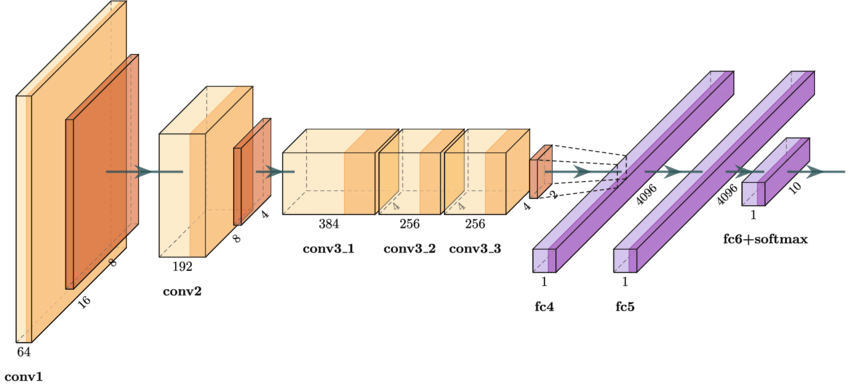

In [13]:
from torch.nn.modules.pooling import MaxPool2d
from torch import nn
import torch

class OurAlexnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_extractor = nn.Sequential(*[
                                        nn.Conv2d(3, 96, (11, 11), stride=4, padding=1), # Conv2d(input_dimensions, out_dimensions, kernel_shape, stride=1, padding=0)
                                        nn.ReLU(),  # activation function
                                        nn.MaxPool2d((3, 3), stride=2), # MaxPool2d(kernel_shape, stride=1)
                                        nn.Conv2d(96, 256, (5, 5), padding=2),
                                        nn.ReLU(),
                                        nn.MaxPool2d((3, 3), stride=2),
                                        nn.Conv2d(256, 384, (3, 3), padding=1),
                                        nn.ReLU(),
                                        nn.Conv2d(384, 384, (3, 3), padding=1),
                                        nn.ReLU(),
                                        nn.Conv2d(384, 256, (3, 3), padding=1),
                                        nn.ReLU(),
                                        nn.MaxPool2d((3, 3), stride=2),
                                        nn.Flatten() # reshape tensort Batch_size X Channels X Width X Height -> Batch_size X (Channels * Width * Height)
                                        ])
        
        self.classifier = nn.Sequential(*[
                                        nn.Linear(5*5*256, 4096), # Linear(input_dimensions, out_dimensions)
                                        nn.ReLU(),
                                        nn.Dropout(0.5),
                                        nn.Linear(4096, 4096),
                                        nn.ReLU(),
                                        nn.Dropout(0.5),
                                        nn.Linear(4096, 1000), # last out dimension must be equal to number of classes
        ])

    def forward(self, x):
        features = self.feature_extractor(x)
        out = self.classifier(features)
        return out

net = OurAlexnet()
res = net(torch.randn((1, 3, 224, 224)))
res.shape

torch.Size([1, 1000])

## 2.4 Model training
Training process can be divided on two steps:
 1. Initialization of model, optimizer and Loss function object
 2. performing cycle:

```
for epoch in EPOCHS:
    # train stage
    for batch in all batches:
        perform optimization step
    # evaluation stage
    evaluate model
```


### Optimization step

 0. Move tensor to GPU (if necessary) 
 1. calculate model prediction
 2. calculate value of loss function
 3. perform gradient descent step

### model evaluation
 0. change working mode of model
 1. for all image in testing (validation) dataset calculate prediction
 2. calculate permormance matric based on predicted labels and ground-truth ones
 3. If there is no improvement in performance, stop training (optionally)


In [ ]:
### Model usage
# Switching the model to training/prediction mode (changing the behavior of some layers - Dropout, Batch normalization...)
net.train(), net.eval() 
# Moving the model to the video card memory / to the RAM
net.cuda(), net.cpu()
# Model Prediction
result = net(some_input_tensor)

print(net)
# Listing Model Parameters
for param in net.parameters():
    print(param.shape)
################################################################################################

### Using the optimizer
# Initialization
from torch.optim import SGD
optimizer = SGD(params=net.parameters(), lr=1e-3, momentum=0.9)
# Resetting gradients (required before each weight update)
optimizer.zero_grad()
# Optimization step with parameter update
optimizer.step()
################################################################################################

### Usage of Loss Function
# Initialization
from torch.nn import CrossEntropyLoss
CE = CrossEntropyLoss()
# Loss function value calculation, receives a batch of model predictions and a batch of GT labels
# For CrossEntropyLoss, predictions can be One-hot encoded, and GT labels - in the form of a tensor of class indices
loss = CE(predictions, ground_truth)
# loss is an object. to access the numerical value of the loss function, the special method is used 
loss_val = loss.item()

# Backpropagation of error, calculation of gradients
loss.backward()
################################################################################################

### Calculation of performance metric
from sklearn.metrics import accuracy_score
# Here predictions and true labels should be represented as tensors of class indices (in vecor form)
predictions = torch.argmax(predictions, axis=1) # Translation from One-hot encoding to Label encoding
accuracy_metric = accuracy_score(predictions, ground_truth)

probabilities = torch.nn.functional.softmax(raw_predictions) # Obtain class probabilities from logits


## 2.3 Using SOTA models pre-trained on Imagenet

In [ ]:
from torchvision.models import mobilenet_v3_small

net = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=False)


classes = len(dataset.df['ClassId'].unique())
print(classes, ' classes in dataset')

net.classifier[-1] = torch.nn.Linear(net.classifier[-1].in_features, classes)


Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip


5  classes in dataset


# Training

In [ ]:
# Implement a learning loop here

# Model, Optimizer, and Loss Function Initialization


EPOCHS = 3

for epoch in range(EPOCHS):
    # train stage
    net.train()
    net.cuda()
    result = net(some_input_tensor)
    print(net)
    from torch.optim import SGD
    for x, y in train_dataloader:
        # Implement Optimization Step
        # Initialization
        optimizer = SGD(params=net.parameters(), lr=1e-3, momentum=0.9)
        # Resetting gradients (required before each weight update)
        optimizer.zero_grad()
        # Optimization step with parameter update
        optimizer.step()

    # evaluation stage
    for x, y in valid_dataloader:
        # Implement Model Estimation Process
    
    #  Print training state: current epoch, accuracy, sum/mean of loss function

    # (optional) Stop training if there is no improvement

## 2.5 Saving and loading models

In [ ]:
net.cpu()
torch.save(net.state_dict(), '/content/drive/My Drive/Colab Notebooks/dict_checkpoint.pth')

states = torch.load('/content/drive/My Drive/Colab Notebooks/dict_checkpoint.pth')

net2 = mobilenet_v3_small(pretrained=True)
net2.classifier[-1] = nn.Linear(net.classifier[-1].in_features, classes)

net2.load_state_dict(states)
states.keys()

odict_keys(['features.0.0.weight', 'features.0.1.weight', 'features.0.1.bias', 'features.0.1.running_mean', 'features.0.1.running_var', 'features.0.1.num_batches_tracked', 'features.1.block.0.0.weight', 'features.1.block.0.1.weight', 'features.1.block.0.1.bias', 'features.1.block.0.1.running_mean', 'features.1.block.0.1.running_var', 'features.1.block.0.1.num_batches_tracked', 'features.1.block.1.fc1.weight', 'features.1.block.1.fc1.bias', 'features.1.block.1.fc2.weight', 'features.1.block.1.fc2.bias', 'features.1.block.2.0.weight', 'features.1.block.2.1.weight', 'features.1.block.2.1.bias', 'features.1.block.2.1.running_mean', 'features.1.block.2.1.running_var', 'features.1.block.2.1.num_batches_tracked', 'features.2.block.0.0.weight', 'features.2.block.0.1.weight', 'features.2.block.0.1.bias', 'features.2.block.0.1.running_mean', 'features.2.block.0.1.running_var', 'features.2.block.0.1.num_batches_tracked', 'features.2.block.1.0.weight', 'features.2.block.1.1.weight', 'features.2.bl

## Model inference
For each input image:
  1. Make transformations
  2. Increase dimension (create a batch from one image)
  3. Move to GPU (if needed)
  4. Make a prediction
  5. Post-process of the model prediction (find the index with the maximum response, determine the probability of belonging to a class)


In [ ]:
# Infer Trained Model

# write a function that classifies a single image
def predict(image):
    # should return class index
    

some_image, gt_label = dataset.__getitem__(100)

prediction = predict(some_image)
print(prediction)

## Tasks
 - create a model that consists of pretrained feature extractor and your custom classification head


In [ ]:
dumb_layer = nn.Identity()
# you can replace parts of a model by another torch.nn.Module modules or stack some layers above existing model

# Do it here


 - create your own model with few layers performing classification on MNIST dataset

Documentation of layers in PyTorch https://pytorch.org/docs/stable/nn.html
Use convolutional, linear layers, ReLU between layers as activation function.  

In [ ]:
mnist_train_dataset = torchvision.datasets.MNIST('./', train=True)
mnist_test_dataset = torchvision.datasets.MNIST('./', train=False)

In [ ]:
# Do it here

 - apply geometric and color transformations to an image and visualize it
 
 https://pytorch.org/vision/stable/transforms.html

--2022-05-06 14:22:34--  https://funcakes.com/content/uploads/2021/02/Red-Velvet-Cake-with-Fruit-960x720-c-default.jpg
Resolving funcakes.com (funcakes.com)... 62.221.211.96
Connecting to funcakes.com (funcakes.com)|62.221.211.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154351 (151K) [image/jpeg]
Saving to: ‘Red-Velvet-Cake-with-Fruit-960x720-c-default.jpg.3’

Red-Velvet-Cake-wit 100%[===================>] 150.73K   543KB/s    in 0.3s    

2022-05-06 14:22:35 (543 KB/s) - ‘Red-Velvet-Cake-with-Fruit-960x720-c-default.jpg.3’ saved [154351/154351]



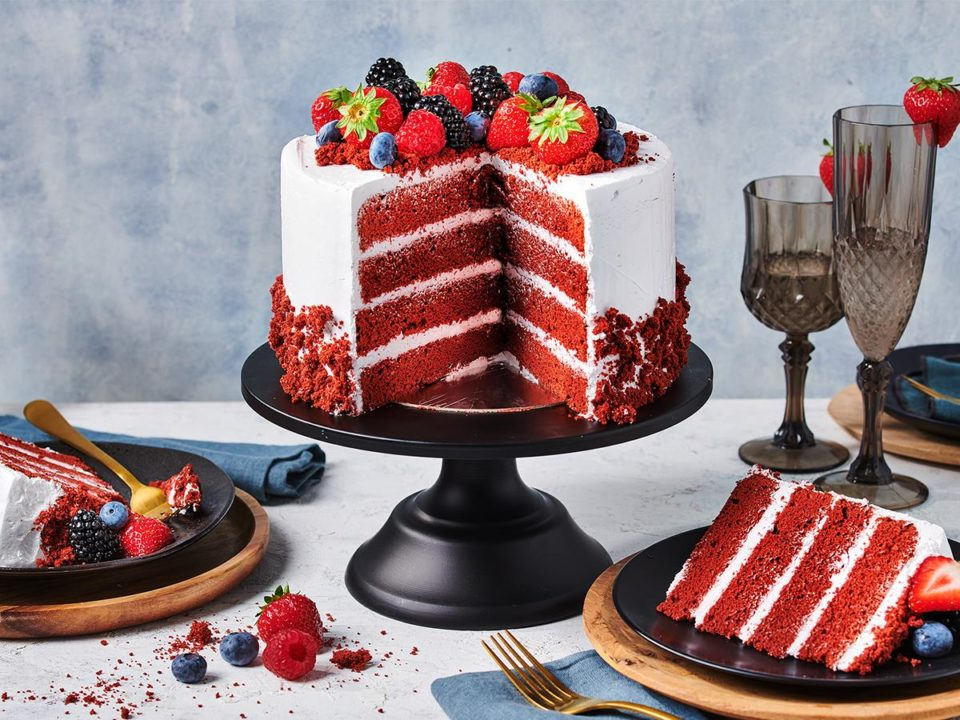

In [ ]:
!wget https://funcakes.com/content/uploads/2021/02/Red-Velvet-Cake-with-Fruit-960x720-c-default.jpg

just_image = cv.imread('Red-Velvet-Cake-with-Fruit-960x720-c-default.jpg')
cv2_imshow(just_image)

In [ ]:
# Do it here
a = torch.Tensor([1, 2, 3])
a_numpy = a.numpy() # Converting a tensor to a numpy array for visualization

A little about additional features
  - Logging (WandB, Tensorboard)
  - Hyperparameter optimization (Optuna)
  - Wrappers (Lightning, Catalyst)
  - frameworks for specific tasks: MMlab, Detectron2
  - PyTorch analogs: Tensorflow, Jax